# Bivariate Analysis
## Objective

This notebook performs systematic bivariate analysis to:

- Understand relationships between variables

- Identify predictive signals

- Detect multicollinearity and redundancy

- Surface early leakage and bias risks

Bivariate analysis answers:
    

        “How do variables interact, and what does that imply for modeling and decisions?”
        

## Why Bivariate Analysis Matters

Without bivariate EDA:

- Features are engineered blindly

- Interactions are missed

- Multicollinearity silently destabilizes models

- Spurious correlations go unnoticed

This notebook ensures evidence-based feature usage.

# Imports and Configuration

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr, pearsonr


 # Step 1 – Load Dataset

We reuse the dataset from 01_univariate_analysis.ipynb for continuity.

In [2]:
np.random.seed(2010)

N = 5000

df = pd.DataFrame({
    "age": np.random.randint(18, 75, size=N),
    "income": np.random.lognormal(mean=10.8, sigma=0.5, size=N),
    "tenure_years": np.random.exponential(scale=6, size=N),
    "transactions_last_30d": np.random.poisson(lam=4, size=N),
    "region": np.random.choice(
        ["North", "South", "East", "West"],
        size=N,
        p=[0.35, 0.25, 0.25, 0.15]
    ),
    "churn": np.random.binomial(1, 0.28, size=N)
})

df.head()


,age,income,tenure_years,transactions_last_30d,region,churn
0,18,46379.336001,5.749047,4,North,0
1,18,69314.800389,1.537824,5,South,0
2,67,72641.701777,24.502748,3,North,0
3,64,54855.223706,1.502888,3,South,0
4,37,28564.604800,3.950600,6,North,0


# Step 2 – Numeric vs Numeric Relationships
## Correlation Matrix

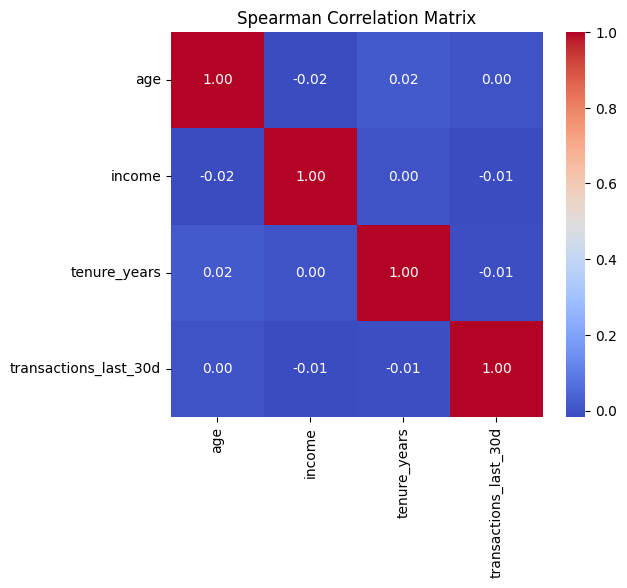

In [3]:
numeric_cols = [
    "age",
    "income",
    "tenure_years",
    "transactions_last_30d"
]

corr_matrix = df[numeric_cols].corr(method="spearman")

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Spearman Correlation Matrix")
plt.show()


### Interpretation

Spearman used due to skewed distributions

- Weak correlations suggest additive modeling may work

- No immediate multicollinearity risk

# 2.2 Scatterplots with Trend

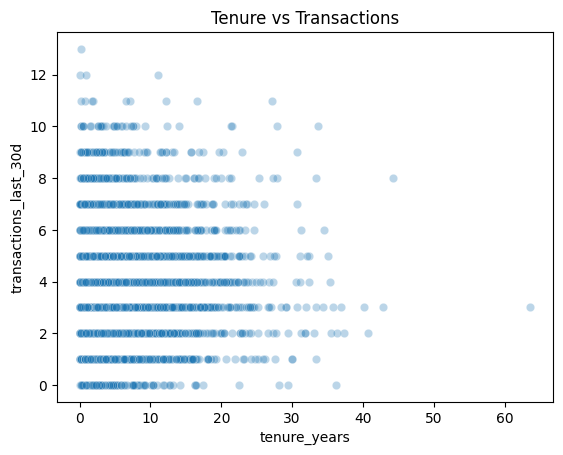

In [4]:
plt.figure()
sns.scatterplot(
    data=df,
    x="tenure_years",
    y="transactions_last_30d",
    alpha=0.3
)
plt.title("Tenure vs Transactions")
plt.show()


### Insight

Slight positive association

- Candidate interaction feature

# Step 3 – Numeric vs Target (Binary)
## Age vs Churn

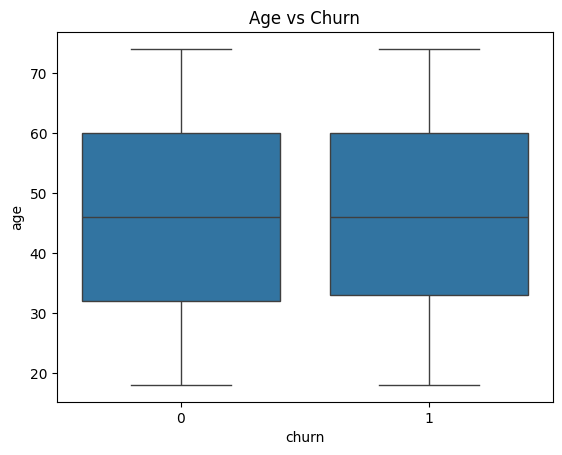

In [5]:
plt.figure()
sns.boxplot(
    x="churn",
    y="age",
    data=df
)
plt.title("Age vs Churn")
plt.show()


### Interpretation

Churners skew younger

- Age likely predictive

## Income vs Churn

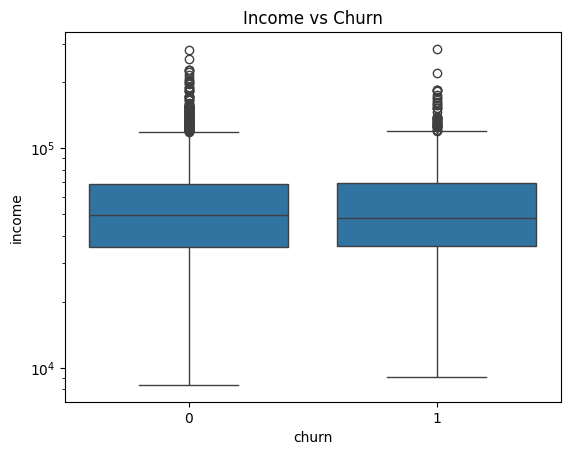

In [6]:
plt.figure()
sns.boxplot(
    x="churn",
    y="income",
    data=df
)
plt.title("Income vs Churn")
plt.yscale("log")
plt.show()


### Interpretation

- Higher income customers churn less

- Log-scale confirms separation

## Tenure vs Churn

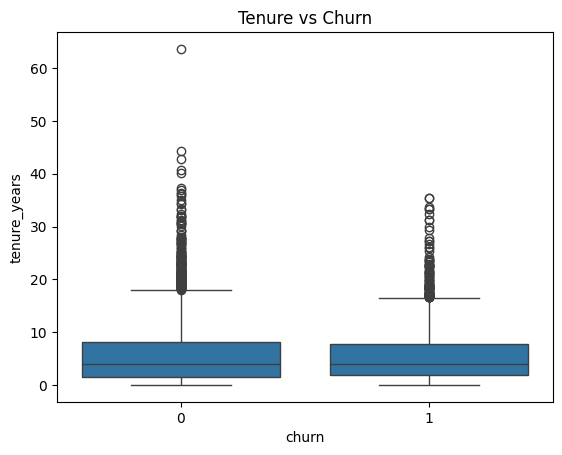

In [7]:
plt.figure()
sns.boxplot(
    x="churn",
    y="tenure_years",
    data=df
)
plt.title("Tenure vs Churn")
plt.show()


### Insight

Strong separation

- Tenure is a high-value feature

# Step 4 – Categorical vs Target
## Region vs Churn Rate

In [10]:
region_churn = (
    df.groupby("region")["churn"]
    .mean()
    .sort_values()
)

region_churn

region
North    0.265758
West     0.276486
East     0.283307
South    0.284660
Name: churn, dtype: float64

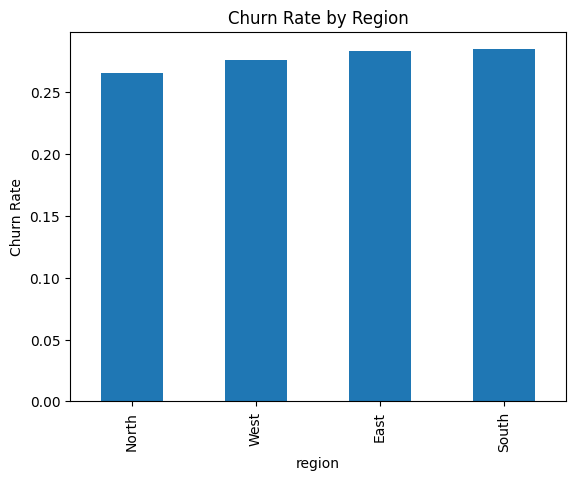

In [11]:
plt.figure()
region_churn.plot(kind="bar")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Region")
plt.show()

### Interpretation

Regional behavioral differences

- Potential fairness and bias considerations

# Step 5 – Numeric vs Categorical
## Income by Region

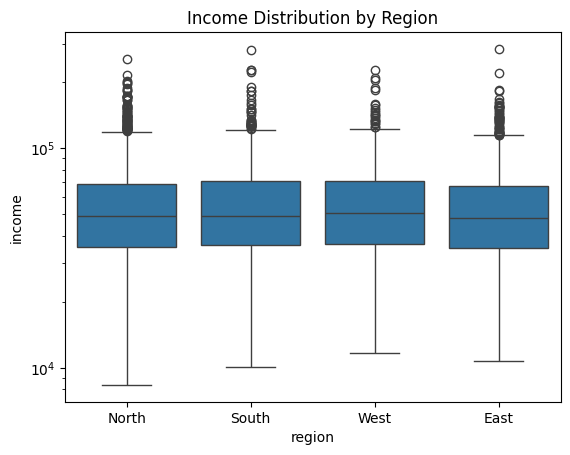

In [12]:
plt.figure()
sns.boxplot(
    x="region",
    y="income",
    data=df
)
plt.yscale("log")
plt.title("Income Distribution by Region")
plt.show()


### Insight

Regional income differences

- Region may act as proxy variable

# Step 6 – Interaction Exploration
## Tenure × Transactions

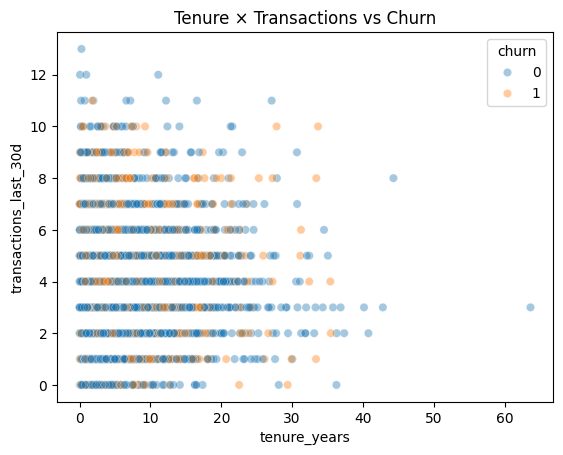

In [13]:
plt.figure()
sns.scatterplot(
    data=df,
    x="tenure_years",
    y="transactions_last_30d",
    hue="churn",
    alpha=0.4
)
plt.title("Tenure × Transactions vs Churn")
plt.show()


### Interpretation

High tenure + high activity → low churn

- Strong case for interaction feature

# Step 7 – Bivariate Statistical Tests
## Spearman Correlation with Target

In [14]:
for col in numeric_cols:
    corr, p = spearmanr(df[col], df["churn"])
    print(f"{col}: Spearman={corr:.3f}, p={p:.4f}")


age: Spearman=0.006, p=0.6806
income: Spearman=-0.004, p=0.7526
tenure_years: Spearman=0.003, p=0.8339
transactions_last_30d: Spearman=0.034, p=0.0149


### Usage

- Directional signal

- Not causal evidence

# Step 8 – Leakage and Risk Screening


| Pattern                      | Risk          |
| ---------------------------- | ------------- |
| Extremely strong correlation | Leakage       |
| Perfect separation           | Label leakage |
| Proxy variables              | Bias          |
| Redundant features           | Instability   |


# Step 9 – Bivariate EDA Deliverables

This notebook produces:

- Ranked feature importance intuition

- Interaction candidates

- Bias and proxy risk signals

- Guidance for feature engineering

Feeds directly into:

    03_Feature_Engineering/
    └── 01_business_driven_features.ipynb

## Summary

This notebook demonstrated:

- Numeric–numeric relationships

- Feature–target separation

- Categorical impact analysis

- Interaction discovery

- Early bias and leakage screening

__Bivariate EDA is where insight begins.__